In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from itertools import product
import time
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA

In [66]:
def get_metrics(cv_dict, classifier, result = None, metrics = ('accuracy', 'precision', 'recall', 'f1'), is_test = False):
    if result is None:
        result = pd.DataFrame(columns=['classifier', 'metric', 'mean', 'std'])
    for metric in metrics:
        if is_test:
            tmp_result = {'classifier': classifier, 'metric': metric}
            tmp_result['mean'] = cv_dict[('test_' + metric)].mean()
            tmp_result['std'] = cv_dict[('test_' + metric)].std()
            result = result.append(tmp_result, ignore_index=True)
        else:
            tmp_result = {'classifier': classifier, 'metric': metric}
            tmp_result['mean'] = cv_dict[('train_' + metric)].mean()
            tmp_result['std'] = cv_dict[('train_' + metric)].std()
            result = result.append(tmp_result, ignore_index=True)
    return result
    

In [3]:
data = pd.read_csv('atlas-higgs-challenge-2014-v2.csv')

In [4]:
data.head()

EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   100000       138.470                       51.655        97.827    27.980   
1   100001       160.937                       68.768       103.235    48.146   
2   100002      -999.000                      162.172       125.953    35.635   
3   100003       143.905                       81.417        80.943     0.414   
4   100004       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3               -999.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_leading_eta  \
0               3.064      41.928  ...                2.150   
1               3.473       2.078  ...                0.725   
2               3.148       9.336  ...                2.053   
3               3.310       0.414  ...             -999.000   
4               3.891      16.405  ...             -999.000   

   PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
0                0.444                 46.062                    1.24   
1                1.158               -999.000                 -999.00   
2               -2.028               -999.000                 -999.00   
3             -999.000               -999.000                 -999.00   
4             -999.000               -999.000                 -999.00   

   PRI_jet_subleading_phi  PRI_jet_all_pt    Weight  Label  KaggleSet  \
0                  -2.475         113.497  0.000814      s          t   
1                -999.000          46.226  0.681042      b          t   
2                -999.000          44.251  0.715742      b          t   
3                -999.000          -0.000  1.660654      b          t   
4                -999.000           0.000  1.904263      b          t   

   KaggleWeight  
0      0.002653  
1      2.233584  
2      2.347389  
3      5.446378  
4      6.245333  

[5 rows x 35 columns]

In [5]:
research_data = data.loc[data['Label'] == 's'].sample(15000)

In [6]:
research_data = research_data.append(data.loc[data['Label'] == 'b'].sample(15000))

In [7]:
labels = research_data.Label
research_data.drop(['Weight', 'Label', 'KaggleSet', 'KaggleWeight'], axis=1, inplace=True)

In [5]:
labels_total = data.Label
data.drop(['Weight', 'Label', 'KaggleSet', 'KaggleWeight'], axis=1, inplace=True)

In [6]:
scoring = ['precision_macro', 'recall_macro']

In [7]:
enc = LabelEncoder()

In [8]:
enc.fit(labels_total)

LabelEncoder()

In [9]:
labels_total = enc.transform(labels_total)

In [42]:
qda = QuadraticDiscriminantAnalysis()
lda = LinearDiscriminantAnalysis()

In [45]:
cv_qda = cross_validate(qda, data.drop('EventId', axis=1), labels_total, cv=10, n_jobs=5, scoring='accuracy,precision,recall,f1'.split(','))

In [64]:
cv_mlp = cross_validate(mlp, data, labels_total, cv=10, n_jobs=4, fit_params={,  scoring='accuracy,precision,recall,f1'.split(','))

In [68]:
result_metrics = get_metrics(cv_lda, 'LDA (full)')
result_metrics = get_metrics(cv_qda, 'QDA (full)', result_metrics)
result_metrics = get_metrics(cv_mlp, 'MLP', result_metrics)


In [76]:
result_metrics

classifier     metric      mean       std
0   LDA (full)   accuracy  0.745677  0.001361
1   LDA (full)  precision  0.668531  0.003383
2   LDA (full)     recall  0.507054  0.002700
3   LDA (full)         f1  0.576694  0.002070
4   QDA (full)   accuracy  0.735165  0.001695
5   QDA (full)  precision  0.633462  0.002928
6   QDA (full)     recall  0.533642  0.003452
7   QDA (full)         f1  0.579280  0.002977
8          MLP   accuracy  0.786975  0.023086
9          MLP  precision  0.722827  0.051228
10         MLP     recall  0.635474  0.141806
11         MLP         f1  0.661588  0.081830

In [57]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [61]:
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

***PCA***

In [78]:
data.drop('EventId', axis = 1, inplace=True)

In [79]:
pca = PCA(n_components=len(data.columns))

In [80]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [81]:
evr = pca.explained_variance_ratio_

In [82]:
cumul_evr = np.cumsum(evr)

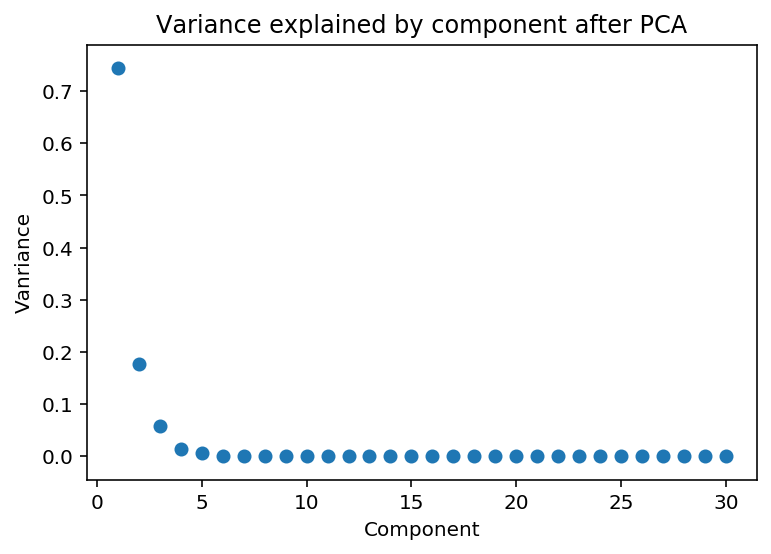

In [84]:
fig, ax = plt.subplots(dpi=144); 
ax.scatter(range(1, 31), evr);
ax.set_xlabel('Component'); 
ax.set_ylabel('Vanriance');
ax.set_title('Variance explained by component after PCA')
plt.show()

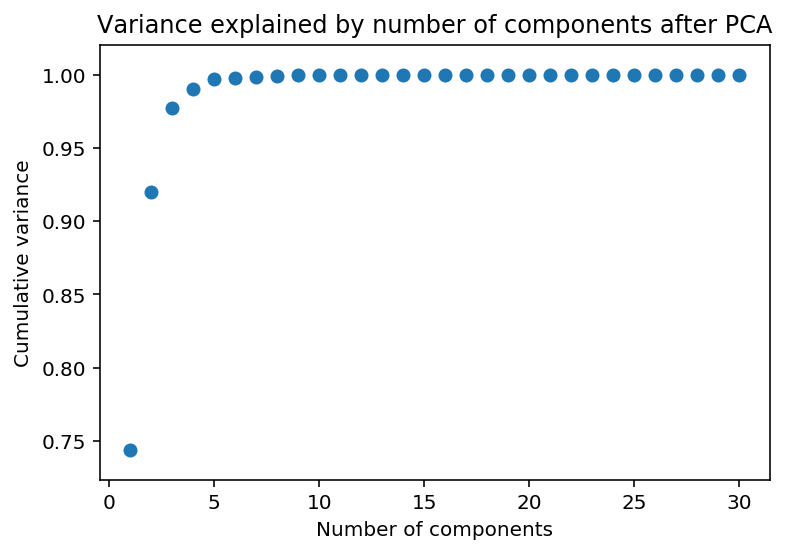

In [104]:
fig, ax = plt.subplots(dpi=144); 
ax.scatter(range(1, 31), cumul_evr);
ax.set_xlabel('Number of components'); 
ax.set_ylabel('Cumulative variance');
ax.set_title('Variance explained by number of components after PCA')
plt.show()

In [90]:
data_pca = data.iloc[:, :5]

***Po PCA***

In [92]:
qda_pca = QuadraticDiscriminantAnalysis()
lda_pca = LinearDiscriminantAnalysis()

In [95]:
cv_lda = cross_validate(lda, data_pca, labels_total, cv=10, n_jobs=5, scoring='accuracy,precision,recall,f1'.split(','))

In [94]:
cv_qda = cross_validate(qda, data_pca, labels_total, cv=10, n_jobs=5, scoring='accuracy,precision,recall,f1'.split(','))

In [96]:
result_metrics = get_metrics(cv_qda, 'QDA (after-PCA)', result_metrics)
result_metrics = get_metrics(cv_lda, 'LDA (after-PCA)', result_metrics)

In [106]:
cv_mlp = cross_validate(mlp, scaler.fit_transform(data_pca), labels_total, cv=10, n_jobs=4, scoring='accuracy,precision,recall,f1'.split(','))

In [107]:
get_metrics(cv_mlp, 'MLP (after-PCA)')

classifier     metric      mean       std
0  MLP (after-PCA)   accuracy  0.816255  0.001641
1  MLP (after-PCA)  precision  0.757838  0.009470
2  MLP (after-PCA)     recall  0.679840  0.017144
3  MLP (after-PCA)         f1  0.716477  0.005967

In [100]:
result_metrics = get_metrics(cv_mlp, 'MLP (after-PCA)', result_metrics)

In [102]:
result_metrics.to_csv('Result_metrics.csv', index=False)

***Deep Learning***

In [43]:
scaler = StandardScaler()
scaler.fit(research_data)
X_train, X_test, y_train, y_test = train_test_split(scaler.transform(research_data), labels, test_size=0.33, random_state=42)

In [44]:
mlp = MLPClassifier()

In [45]:
layer_sizes = list(product([10,25,50],repeat = 3))
activations = ['tanh', 'relu']

In [46]:
param_grid = dict(hidden_layer_sizes=layer_sizes, activation=activations)


In [47]:
grid = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=5, cv=5)

In [ ]:
grid_result = grid.fit(scaler.transform(research_data), labels)

In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
file = open('.\\GridSearchCV_MLP_scaled.txt', 'w')
file.write("Best: %f using %s " % (grid_result.best_score_, grid_result.best_params_))
for mean, stdev, param in zip(means, stds, params):
    file.write("%f (%f) with: %r\n" % (mean, stdev, param))
file.close()

In [55]:
import pickle

**Po GridSearchCV**

In [ ]:
pickle.dump( grid_result, open( "save.p", "wb" ) )

In [10]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 25, 50), batch_size=1024, activation='tanh')

In [46]:
scaler = StandardScaler()
scaler.fit(data.drop('EventId', axis=1))
X_train, X_test, y_train, y_test = train_test_split(scaler.transform(data.drop('EventId', axis=1)), labels_total, test_size=0.33, random_state=42)

In [47]:
start = time.time()

mlp.fit(X_train, y_train)

training_time = time.time() - start

In [48]:
print(training_time)

300.37912368774414


In [49]:
mlp.score(X_test, y_test)

0.8367151941159696

In [50]:
y_pred = mlp.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88    177645
           1       0.79      0.71      0.75     92374

    accuracy                           0.84    270019
   macro avg       0.82      0.81      0.81    270019
weighted avg       0.83      0.84      0.83    270019



In [52]:
y_pred_proba = mlp.predict_proba(X_test)[:, 1]

In [56]:
pickle.dump(mlp, open( "model_mlp.p", "wb" ) )

In [128]:
MLP_pca = MLPClassifier(hidden_layer_sizes=(10, 25, 50), batch_size=1024, activation='tanh')

In [108]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(data_pca, labels_total, test_size=0.33, random_state=42)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(data, labels_total, test_size=0.33, random_state=42)

***ROC***

In [136]:
MLP = pickle.load(open( 'model_mlp.p', "rb" ))
classifiers = ['LDA (full)', 'QDA (full)', 'LDA (after-PCA)', 'QDA (after-PCA)', 'MLP (full)', 'MLP (after-PCA)']

In [117]:
lda.fit(X_train, y_train)
qda.fit(X_train, y_train)
lda_pca.fit(X_train_pca, y_train_pca)
qda_pca.fit(X_train_pca, y_train_pca)


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [130]:
MLP_pca.fit(scaler.fit_transform(X_train_pca), y_train_pca)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size=1024, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 25, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [120]:
# mlp.fit(scaler.fit_transform(X_train), y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size=1024, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 25, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [135]:
y_pred_proba = []
y_pred_proba.append(lda.predict_proba(X_test)[:,1])
y_pred_proba.append(qda.predict_proba(X_test)[:,1])
y_pred_proba.append(lda_pca.predict_proba(X_test_pca)[:,1])
y_pred_proba.append(qda_pca.predict_proba(X_test_pca)[:,1])
y_pred_proba.append(MLP.predict_proba(scaler.fit_transform(X_test))[:,1])
y_pred_proba.append(MLP_pca.predict_proba(scaler.fit_transform(X_test_pca))[:,1])



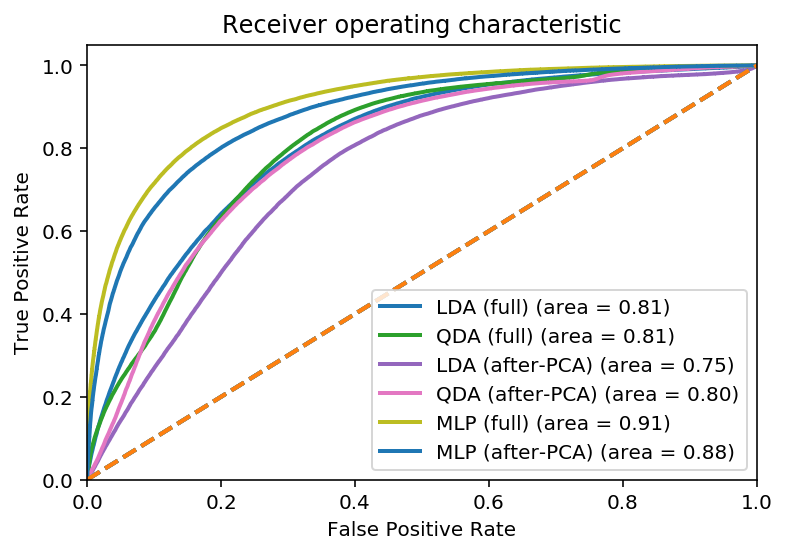

In [139]:
plt.figure(dpi=144)

for ii, clf in enumerate(classifiers):
    if 'PCA' in clf:
        fpr, tpr, thresholds = roc_curve(y_true=y_test_pca, y_score=y_pred_proba[ii])
    else:
        fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_proba[ii])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='{} (area = %0.2f)'.format(clf) % roc_auc)
    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Podział na próbkę uczącą i testową

In [22]:
data = pd.read_csv('atlas-higgs-challenge-2014-v2.csv')

In [24]:
labels = data.Label
data.drop(['EventId', 'Weight', 'Label', 'KaggleSet', 'KaggleWeight'], axis=1, inplace=True)

In [25]:
enc = LabelEncoder()
enc.fit(labels)

LabelEncoder()

In [26]:
labels = enc.transform(labels)

In [27]:
data = data.iloc[:,:5] # po PCA

In [61]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

In [29]:
qda_pca = QuadraticDiscriminantAnalysis()
lda_pca = LinearDiscriminantAnalysis()

In [62]:
cv_qda = cross_validate(qda_pca, X_train, y_train, cv=10, n_jobs=5, scoring='accuracy,precision,recall,f1'.split(','), return_train_score=True)

In [63]:
cv_lda = cross_validate(lda_pca, X_train, y_train, cv=10, n_jobs=5, scoring='accuracy,precision,recall,f1'.split(','), return_train_score=True)

In [65]:
cv_lda

{'fit_time': array([0.58684278, 0.56988549, 0.61775637, 0.62274408, 0.52309918,
        0.54155064, 0.6063776 , 0.58942199, 0.52360153, 0.56448746]),
 'score_time': array([0.09773588, 0.08277774, 0.08577013, 0.08975887, 0.0866785 ,
        0.08278155, 0.08776426, 0.09175539, 0.08476973, 0.08776617]),
 'test_accuracy': array([0.69085404, 0.68788078, 0.69309766, 0.69065339, 0.69017913,
        0.6926234 , 0.69008792, 0.6908358 , 0.68917588, 0.69411357]),
 'train_accuracy': array([0.69090003, 0.69117567, 0.69070546, 0.69084328, 0.69110473,
        0.69065884, 0.69125674, 0.69098312, 0.69118175, 0.69058448]),
 'test_precision': array([0.56942265, 0.56438817, 0.5742994 , 0.57073955, 0.56760761,
        0.57376402, 0.56772425, 0.56969602, 0.56633742, 0.5781789 ]),
 'train_precision': array([0.5702328 , 0.57082508, 0.56959471, 0.56995433, 0.57031024,
        0.56968262, 0.57075323, 0.57019999, 0.57074671, 0.56943871]),
 'test_recall': array([0.38780853, 0.37626883, 0.39085372, 0.37929377, 0.3

In [30]:
qda_pca.fit(X_train, y_train)
lda_pca.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

#### QDA classification report

In [31]:
print(classification_report(qda_pca.predict(X_train), y_train))

              precision    recall  f1-score   support

           0       0.61      0.89      0.72    247117
           1       0.86      0.53      0.66    301102

    accuracy                           0.69    548219
   macro avg       0.73      0.71      0.69    548219
weighted avg       0.74      0.69      0.69    548219



In [32]:
print(classification_report(qda_pca.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.61      0.89      0.72    121997
           1       0.85      0.53      0.66    148022

    accuracy                           0.69    270019
   macro avg       0.73      0.71      0.69    270019
weighted avg       0.74      0.69      0.69    270019



#### LDA Classification report

In [33]:
print(classification_report(lda_pca.predict(X_train), y_train))

              precision    recall  f1-score   support

           0       0.85      0.73      0.78    421725
           1       0.39      0.57      0.46    126494

    accuracy                           0.69    548219
   macro avg       0.62      0.65      0.62    548219
weighted avg       0.74      0.69      0.71    548219



In [34]:
print(classification_report(lda_pca.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.85      0.73      0.78    207512
           1       0.39      0.57      0.46     62507

    accuracy                           0.69    270019
   macro avg       0.62      0.65      0.62    270019
weighted avg       0.74      0.69      0.71    270019



#### MLP

In [35]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 25, 50), batch_size=1024, activation='tanh')

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0       138.470                       51.655        97.827    27.980   
1       160.937                       68.768       103.235    48.146   
2      -999.000                      162.172       125.953    35.635   
3       143.905                       81.417        80.943     0.414   
4       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  
0                  0.91  
1               -999.00  
2               -999.00  
3               -999.00  
4               -999.00

In [67]:
scaler = StandardScaler()
scaler.fit(data)
X_train, X_test, y_train, y_test = train_test_split(scaler.transform(data), labels, test_size=0.33, random_state=42)

In [38]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size=1024, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 25, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [39]:
print(classification_report(mlp.predict(X_train), y_train))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87    394334
           1       0.64      0.78      0.70    153885

    accuracy                           0.82    548219
   macro avg       0.77      0.80      0.78    548219
weighted avg       0.83      0.82      0.82    548219



In [40]:
print(classification_report(mlp.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87    194343
           1       0.64      0.78      0.70     75676

    accuracy                           0.82    270019
   macro avg       0.77      0.80      0.78    270019
weighted avg       0.83      0.82      0.82    270019



In [72]:
cv_mlp = cross_validate(mlp, X_train, y_train, cv=10, n_jobs=4, scoring='accuracy,precision,recall,f1'.split(','), return_train_score=True)

In [58]:
metrics = get_metrics(cv_mlp, 'MLP') # wyniki dla zbioru walidacyjnego po cv
metrics = get_metrics(cv_lda, 'LDA', metrics)
metrics = get_metrics(cv_qda, 'QDA', metrics)

In [59]:
metrics

classifier     metric      mean       std
0         MLP   accuracy  0.816269  0.000996
1         MLP  precision  0.757222  0.008042
2         MLP     recall  0.680318  0.014681
3         MLP         f1  0.716532  0.004797
4         LDA   accuracy  0.690950  0.001773
5         LDA  precision  0.570216  0.003948
6         LDA     recall  0.385269  0.004313
7         LDA         f1  0.459831  0.003807
8         QDA   accuracy  0.693506  0.001602
9         QDA  precision  0.531822  0.001546
10        QDA     recall  0.855449  0.002749
11        QDA         f1  0.655884  0.001367

In [75]:
metrics = get_metrics(cv_mlp, 'MLP', is_test=False) # wyniki dla zbioru uczącego po cv
metrics = get_metrics(cv_lda, 'LDA', metrics, is_test=False)
metrics = get_metrics(cv_qda, 'QDA', metrics, is_test=False)

In [76]:
metrics

classifier     metric      mean       std
0         MLP   accuracy  0.816163  0.000825
1         MLP  precision  0.759958  0.006018
2         MLP     recall  0.674912  0.008798
3         MLP         f1  0.714838  0.002549
4         LDA   accuracy  0.690939  0.000227
5         LDA  precision  0.570174  0.000477
6         LDA     recall  0.385304  0.000699
7         LDA         f1  0.459854  0.000587
8         QDA   accuracy  0.693501  0.000282
9         QDA  precision  0.531813  0.000282
10        QDA     recall  0.855445  0.000457
11        QDA         f1  0.655879  0.000183